In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d2cdeb6e256af80f523f6e5e3345bb6


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | ostrovnoy
Processing Record 3 of Set 1 | tsienyane
City not found. Skipping...
Processing Record 4 of Set 1 | chalus
Processing Record 5 of Set 1 | dingle
Processing Record 6 of Set 1 | banjar
Processing Record 7 of Set 1 | sulangan
Processing Record 8 of Set 1 | seuzach
Processing Record 9 of Set 1 | la rioja
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | inuvik
Processing Record 13 of Set 1 | dunmore town
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | ugoofaaru
Processing Record 17 of Set 1 | mersing
Processing Record 18 of Set 1 | somerset east
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | husavik
Processing Record 21 of Set 1 | poum
Processing Record 22 of Set 1 |

Processing Record 37 of Set 4 | chapais
Processing Record 38 of Set 4 | clarence town
Processing Record 39 of Set 4 | xai-xai
Processing Record 40 of Set 4 | baculin
Processing Record 41 of Set 4 | deputatskiy
Processing Record 42 of Set 4 | long beach
Processing Record 43 of Set 4 | sorland
Processing Record 44 of Set 4 | longkou
Processing Record 45 of Set 4 | shitanjing
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | dongobesh
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | chokurdakh
Processing Record 50 of Set 4 | nanchang
Processing Record 1 of Set 5 | churapcha
Processing Record 2 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 5 | cedar city
Processing Record 4 of Set 5 | baft
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | ilulissat
Processing Record 8 of Set 5 | oistins
Processing Record 9 of Set 5 | tenno
Processing Record 10 of Set 

Processing Record 27 of Set 8 | karratha
Processing Record 28 of Set 8 | stornoway
Processing Record 29 of Set 8 | santiago del estero
Processing Record 30 of Set 8 | palu
Processing Record 31 of Set 8 | priekule
Processing Record 32 of Set 8 | vila franca do campo
Processing Record 33 of Set 8 | itoman
Processing Record 34 of Set 8 | tuktoyaktuk
Processing Record 35 of Set 8 | bertoua
Processing Record 36 of Set 8 | korla
Processing Record 37 of Set 8 | cortez
Processing Record 38 of Set 8 | tidore
City not found. Skipping...
Processing Record 39 of Set 8 | yichun
Processing Record 40 of Set 8 | diego de almagro
Processing Record 41 of Set 8 | inongo
Processing Record 42 of Set 8 | lata
Processing Record 43 of Set 8 | manado
Processing Record 44 of Set 8 | dalbandin
Processing Record 45 of Set 8 | grindavik
Processing Record 46 of Set 8 | bakchar
Processing Record 47 of Set 8 | chagda
City not found. Skipping...
Processing Record 48 of Set 8 | novikovo
Processing Record 49 of Set 8 | 

Processing Record 20 of Set 12 | wladyslawowo
Processing Record 21 of Set 12 | khandbari
Processing Record 22 of Set 12 | bara
Processing Record 23 of Set 12 | salalah
Processing Record 24 of Set 12 | petrokamenskoye
Processing Record 25 of Set 12 | nago
Processing Record 26 of Set 12 | coracao de jesus
Processing Record 27 of Set 12 | ciras
City not found. Skipping...
Processing Record 28 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 29 of Set 12 | xingtai
Processing Record 30 of Set 12 | kokopo
Processing Record 31 of Set 12 | shimoda
Processing Record 32 of Set 12 | paamiut
Processing Record 33 of Set 12 | paso de carrasco
Processing Record 34 of Set 12 | tezpur
Processing Record 35 of Set 12 | manitouwadge
Processing Record 36 of Set 12 | yenagoa
Processing Record 37 of Set 12 | summerville
Processing Record 38 of Set 12 | tibati
Processing Record 39 of Set 12 | bitung
Processing Record 40 of Set 12 | bairiki
Processing Record 41 of Set 12 | fivizzano
Processing

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,53.01,85,95,11.01,NZ,2021-01-20 20:01:27
1,Ostrovnoy,68.0531,39.5131,12.38,92,100,10.76,RU,2021-01-20 20:01:27
2,Chalus,36.6550,51.4204,44.60,93,75,26.46,IR,2021-01-20 20:01:27
3,Dingle,10.9995,122.6711,74.91,91,98,2.51,PH,2021-01-20 20:01:27
4,Banjar,-8.1900,114.9675,75.20,100,75,9.22,ID,2021-01-20 20:01:27
5,Sulangan,11.1373,123.7228,80.53,83,98,3.65,PH,2021-01-20 20:01:28
6,Seuzach,47.5342,8.7261,28.99,93,0,5.75,CH,2021-01-20 20:01:28
7,La Rioja,42.2500,-2.5000,48.20,71,90,10.36,ES,2021-01-20 20:01:22
8,Punta Arenas,-53.1500,-70.9167,62.60,36,0,24.16,CL,2021-01-20 20:00:11
9,Tasiilaq,65.6145,-37.6368,10.40,72,20,3.44,GL,2021-01-20 20:01:28


In [18]:
new_data_col = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_data_col]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-01-20 20:01:27,-46.6000,168.3333,53.01,85,95,11.01
1,Ostrovnoy,RU,2021-01-20 20:01:27,68.0531,39.5131,12.38,92,100,10.76
2,Chalus,IR,2021-01-20 20:01:27,36.6550,51.4204,44.60,93,75,26.46
3,Dingle,PH,2021-01-20 20:01:27,10.9995,122.6711,74.91,91,98,2.51
4,Banjar,ID,2021-01-20 20:01:27,-8.1900,114.9675,75.20,100,75,9.22


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

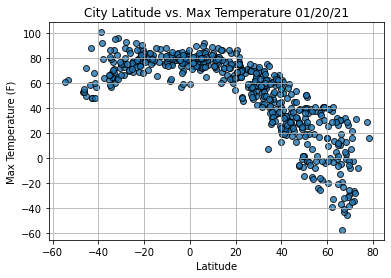

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

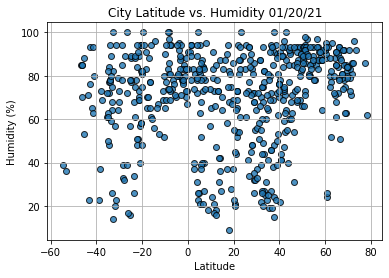

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

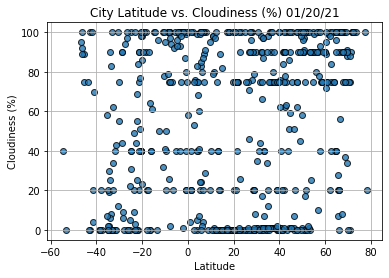

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

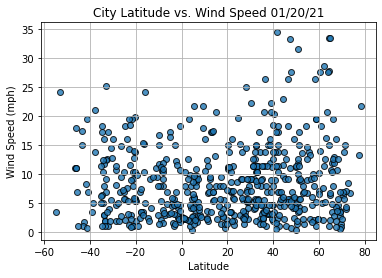

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

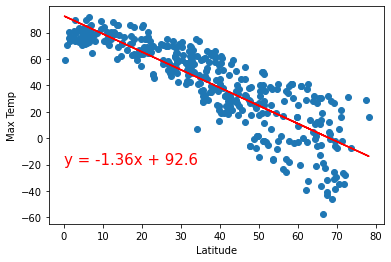

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))

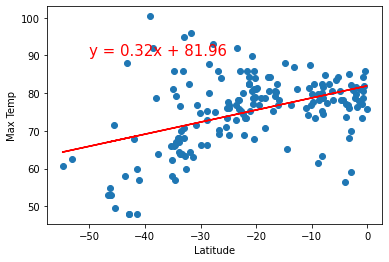

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

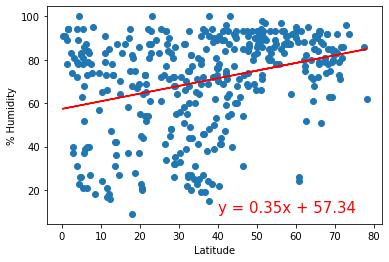

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

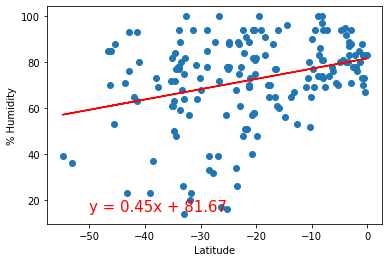

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))    

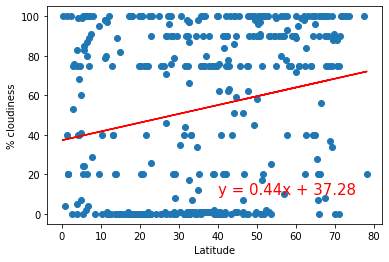

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % cloudiness', '% cloudiness',(40,10))

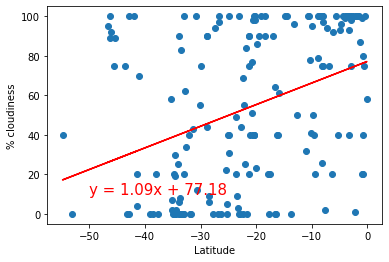

In [40]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % cloudiness', '% cloudiness',(-50,10))

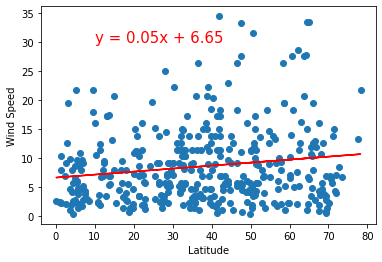

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,30))    

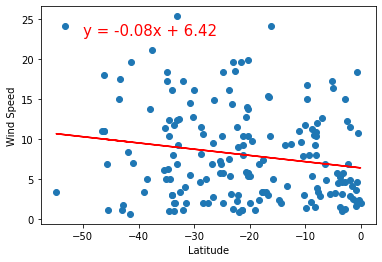

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,23))